In [26]:
import torch
import numpy as np

In [27]:
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


# Modules

### Linear Module

In [28]:
################################################################################
# MIT License
#
# Copyright (c) 2024 University of Amsterdam
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to conditions.
#
# Author: Deep Learning Course (UvA) | Fall 2024
# Date Created: 2024-10-28
################################################################################
"""
This module implements various modules of the network.
You should fill in code into indicated sections.
"""
import numpy as np


class LinearModule(object):
    """
    Linear module. Applies a linear transformation to the input data.
    """

    def __init__(self, in_features, out_features, input_layer=False):
        """
        Initializes the parameters of the module.

        Args:
          in_features: size of each input sample
          out_features: size of each output sample
          input_layer: boolean, True if this is the first layer after the input, else False.

        TODO:
        Initialize weight parameters using Kaiming initialization.
        Initialize biases with zeros.
        Hint: the input_layer argument might be needed for the initialization

        Also, initialize gradients with zeros.
        """

        # Note: For the sake of this assignment, please store the parameters
        # and gradients in this format, otherwise some unit tests might fail.
        self.params = {'weight': None, 'bias': None} # Model parameters
        self.grads = {'weight': None, 'bias': None} # Gradients

        #######################
        # PUT YOUR CODE HERE  #
        #######################
        self.in_features = in_features
        self.out_features = out_features
        self.input_layer = input_layer

        # Kaiming initialization for weights: W = N(0, 2 / in_features)
        self.params['weight'] = np.random.randn(out_features, in_features) * np.sqrt(2. / in_features)

        # Initialize biases to zeros
        self.params['bias'] = np.zeros((1, out_features))

        # Initialize gradients to zeros
        self.grads['weight'] = np.zeros_like(self.params['weight'])
        self.grads['bias'] = np.zeros_like(self.params['bias'])
        #######################
        # END OF YOUR CODE    #
        #######################

    def forward(self, x):
        """
        Forward pass.

        Args:
          x: input to the module
        Returns:
          out: output of the module

        TODO:
        Implement forward pass of the module.

        Hint: You can store intermediate variables inside the object. They can be used in backward pass computation.
        """

        #######################
        # PUT YOUR CODE HERE  #
        #######################
        # Store input for backward pass
        self.x = x
        # Perform linear transformation Y = XW^T + b
        out = np.dot(x, self.params['weight'].T) + self.params['bias']
        #######################
        # END OF YOUR CODE    #
        #######################

        return out

    def backward(self, dout):
        """
        Backward pass.

        Args:
          dout: gradients of the previous module
        Returns:
          dx: gradients with respect to the input of the module

        TODO:
        Implement backward pass of the module. Store gradient of the loss with respect to
        layer parameters in self.grads['weight'] and self.grads['bias'].
        """

        #######################
        # PUT YOUR CODE HERE  #
        #######################
        # Compute gradients: dL/dW = dl/dY^T * dY/dW = dout^T * X
        self.grads['weight'] = np.dot(dout.T, self.x)
        # Compute gradients: dL/db = dl/dY^T * dY/db = dout^T * 1
        self.grads['bias'] = np.sum(dout, axis=0, keepdims=True)
        # Compute gradient with respect to input: dl/dX = dl/dY * dY/dX = dout * W
        dx = np.dot(dout, self.params['weight'])
        #######################
        # END OF YOUR CODE    #
        #######################
        return dx

    def clear_cache(self):
        """
        Remove any saved tensors for the backward pass.
        Used to clean-up model from any remaining input data when we want to save it.

        TODO:
        Set any caches you have to None.
        """
        #######################
        # PUT YOUR CODE HERE  #
        #######################
        self.x = None
        #######################
        # END OF YOUR CODE    #
        #######################


### ELU Module

In [29]:
class ELUModule(object):
    """
    ELU activation module.
    """

    def __init__(self, alpha):
        self.alpha = alpha

    def forward(self, x):
        """
        Forward pass.

        Args:
          x: input to the module
        Returns:
          out: output of the module

        TODO:
        Implement forward pass of the module.

        Hint: You can store intermediate variables inside the object. They can be used in backward pass computation.
        """

        #######################
        # PUT YOUR CODE HERE  #
        #######################
        # Store input for backward pass
        self.x = x
        # Compute ELU activation: f(x) = x if x > 0 else alpha * (exp(x) - 1)
        out = np.where(x > 0, x, self.alpha * (np.exp(x) - 1))
        #######################
        # END OF YOUR CODE    #
        #######################

        return out

    def backward(self, dout):
        """
        Backward pass.
        Args:
          dout: gradients of the previous module
        Returns:
          dx: gradients with respect to the input of the module

        TODO:
        Implement backward pass of the module.
        """

        #######################
        # PUT YOUR CODE HERE  #
        #######################
        # Compute gradient with respect to input: dl/dX = dl/dY * dY/dX
        dx = np.where(self.x > 0, dout, dout * self.alpha * np.exp(self.x))
        #######################
        # END OF YOUR CODE    #
        #######################
        return dx

    def clear_cache(self):
        """
        Remove any saved tensors for the backward pass.
        Used to clean-up model from any remaining input data when we want to save it.

        TODO:
        Set any caches you have to None.
        """
        #######################
        # PUT YOUR CODE HERE  #
        #######################
        self.x = None
        #######################
        # END OF YOUR CODE    #
        #######################



### SoftMax Module

In [30]:
class SoftMaxModule(object):
    """
    Softmax activation module.
    """

    def forward(self, x):
        """
        Forward pass.
        Args:
          x: input to the module
        Returns:
          out: output of the module

        TODO:
        Implement forward pass of the module.
        To stabilize computation you should use the so-called Max Trick - https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/

        Hint: You can store intermediate variables inside the object. They can be used in backward pass computation.
        """

        #######################
        # PUT YOUR CODE HERE  #
        #######################
        # Store input for backward pass
        self.x = x
        # Compute softmax activation: f(x) = exp(x) / sum(exp(x))
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        out = exps / np.sum(exps, axis=1, keepdims=True)
        #######################
        # END OF YOUR CODE    #
        #######################

        return out

    def backward(self, dout):
        """
        Backward pass.
        Args:
          dout: gradients of the previous modul
        Returns:
          dx: gradients with respect to the input of the module

        TODO:
        Implement backward pass of the module.
        """

        #######################
        # PUT YOUR CODE HERE  #
        #######################
        # Compute gradient with respect to input: dl/dX = dl/dY * dY/dX
        dx = dout * self.forward(self.x) * (1 - self.forward(self.x))
        
        #######################
        # END OF YOUR CODE    #
        #######################

        return dx

    def clear_cache(self):
        """
        Remove any saved tensors for the backward pass.
        Used to clean-up model from any remaining input data when we want to save it.

        TODO:
        Set any caches you have to None.
        """
        #######################
        # PUT YOUR CODE HERE  #
        #######################
        self.x = None
        #######################
        # END OF YOUR CODE    #
        #######################


### CrossEntropyModuleNB

In [31]:
class CrossEntropyModuleNB(object):
    """
    Cross entropy loss module.
    """

    def forward(self, x, y):
        """
        Forward pass.
        Args:
          x: input to the module
          y: labels of the input
        Returns:
          out: cross entropy loss

        TODO:
        Implement forward pass of the module.
        """

        #######################
        # PUT YOUR CODE HERE  #
        #######################

        # Convert y to one-hot encoding
        y_true = np.zeros((y.size, x.shape[1]))
        y_true[np.arange(y.size), y] = 1

        # Shape assertion
        assert x.shape == y_true.shape, "CE Loss Forward Pass: Shape mismatch between x and y_true"
        
        # Compute cross-entropy loss
        # Adding small epsilon to avoid log(0)
        eps = 1e-15
        x_clipped = np.clip(x, eps, 1 - eps)
        out = -np.sum(y_true * np.log(x_clipped)) 
        #######################
        # END OF YOUR CODE    #
        #######################

        return out

    def backward(self, x, y):
        """
        Backward pass.
        Args:
          x: input to the module
          y: labels of the input
        Returns:
          dx: gradient of the loss with the respect to the input x.

        TODO:
        Implement backward pass of the module.
        """

        #######################
        # PUT YOUR CODE HERE  #
        #######################
        y_true = np.zeros((y.size, x.shape[1]))
        y_true[np.arange(y.size), y] = 1

        # Shape assertion
        assert x.shape == y_true.shape, "CE Loss Backward Pass: Shape mismatch between x and y_true"

        # Compute gradient with respect to input: dl/dX = dl/dY * dY/dX
        dx = x - y_true
        #######################
        # END OF YOUR CODE    #
        #######################

        return dx

### Unit test functions

In [32]:
def rel_error(x, y):
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))


def eval_numerical_gradient(f, x, verbose=True, h=0.00001):
    fx = f(x)
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h
        fxph = f(x)
        x[ix] = oldval - h
        fxmh = f(x)
        x[ix] = oldval

        grad[ix] = (fxph - fxmh) / (2 * h)
        if verbose:
            print(ix, grad[ix])
        it.iternext()

    return grad


def eval_numerical_gradient_array(f, x, df, h=1e-5):
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index

        oldval = x[ix]
        x[ix] = oldval + h
        pos = f(x).copy()
        x[ix] = oldval - h
        neg = f(x).copy()
        x[ix] = oldval

        grad[ix] = np.sum((pos - neg) * df) / (2 * h)
        it.iternext()
    return grad

In [33]:
def test_linear_backward(self):
    np.random.seed(42)
    rel_error_max = 1e-5

    for test_num in range(10):
        N = np.random.choice(range(1, 20))
        D = np.random.choice(range(1, 100))
        C = np.random.choice(range(1, 10))
        x = np.random.randn(N, D)
        dout = np.random.randn(N, C)

        layer = LinearModule(D, C)

        _ = layer.forward(x)
        dx = layer.backward(dout)
        dw = layer.grads['weight']
        dx_num = eval_numerical_gradient_array(lambda xx: layer.forward(xx), x, dout)
        dw_num = eval_numerical_gradient_array(lambda w: layer.forward(x), layer.params['weight'], dout)

        self.assertLess(rel_error(dx, dx_num), rel_error_max)
        self.assertLess(rel_error(dw, dw_num), rel_error_max)

In [34]:
np.random.seed(42)
rel_error_max = 1e-5

N = np.random.choice(range(1, 20))
D = np.random.choice(range(1, 100))
C = np.random.choice(range(1, 10))
x = np.random.randn(N, D)
dout = np.random.randn(N, C)

print("N, D, C:", N, D, C)
print(f"Input x: {x}, Input shape: {x.shape}")
layer = LinearModule(D, C)

_ = layer.forward(x)
print(f"Forward pass output: {layer.forward(x)}, Forward pass shape: {layer.forward(x).shape}")
dx = layer.backward(dout)
dw = layer.grads['weight']
dx_num = eval_numerical_gradient_array(lambda xx: layer.forward(xx), x, dout)
dw_num = eval_numerical_gradient_array(lambda w: layer.forward(x), layer.params['weight'], dout)


#print("dx", dx)
#print("dx_num", dx_num)
#print("dw", dw)
#print("dw_num", dw_num)
print("rel_error(dx, dx_num)", rel_error(dx, dx_num))
print("rel_error(dw, dw_num)", rel_error(dw, dw_num))
assert rel_error(dx, dx_num) < rel_error_max
assert rel_error(dw, dw_num) < rel_error_max

N, D, C: 7 52 8
Input x: [[-1.11188012  0.31890218  0.27904129  1.01051528 -0.58087813 -0.52516981
  -0.57138017 -0.92408284 -2.61254901  0.95036968  0.81644508 -1.523876
  -0.42804606 -0.74240684 -0.7033438  -2.13962066 -0.62947496  0.59772047
   2.55948803  0.39423302  0.12221917 -0.51543566 -0.60025385  0.94743982
   0.291034   -0.63555974 -1.02155219 -0.16175539 -0.5336488  -0.00552786
  -0.22945045  0.38934891 -1.26511911  1.09199226  2.77831304  1.19363972
   0.21863832  0.88176104 -1.00908534 -1.58329421  0.77370042 -0.53814166
  -1.3466781  -0.88059127 -1.1305523   0.13442888  0.58212279  0.88774846
   0.89433233  0.7549978  -0.20716589 -0.62347739]
 [-1.50815329  1.09964698 -0.17773212 -0.41038331  1.17971634 -0.89820794
   0.83479542  0.29656138 -1.03782988 -0.07580375  0.97296353  0.79559546
   1.49543425  0.33818125  3.37229625 -0.92039081 -0.39863839 -0.06086409
  -1.41875046  1.04249162  0.90353249  0.01900033 -0.53441645 -1.49505387
  -0.78925833  0.74371128 -0.21216142 

In [35]:
weights = np.random.randn(C, D) * np.sqrt(2. / D)
bias = np.ones((1, C))
#print("weights", weights)
print("weights.shape", weights.shape)
print("weight transpose shape", weights.T.shape)
#print("bias", bias)
print("bias.shape", bias.shape)

weights.shape (8, 52)
weight transpose shape (52, 8)
bias.shape (1, 8)


In [36]:
print(x.shape, dout.shape, weights.shape, bias.shape)
print(np.dot(x, weights.T + bias).shape)
print((x.T @ dout).shape) # derivation if X^Tw instead of Xw^T
print((dout.T @ x).shape) # derivation performed in 1a == shape of W (8,52) = (8,52)

(7, 52) (7, 8) (8, 52) (1, 8)
(7, 8)
(52, 8)
(8, 52)


### Visualising numpy arrays

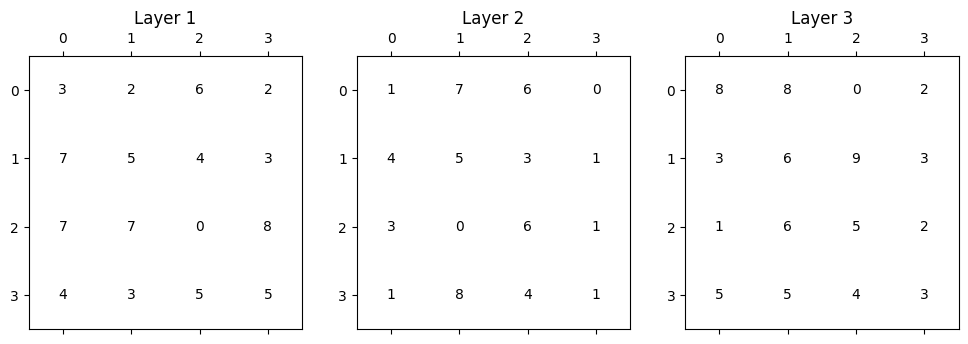

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Sample 3D array
array_3d = np.random.randint(0, 10, (3, 4, 4))  # Shape (3 layers, 4 rows, 4 columns)

# Plotting each layer as a separate subplot
fig, axes = plt.subplots(1, array_3d.shape[0], figsize=(12, 4))

for i in range(array_3d.shape[0]):
    ax = axes[i]
    ax.matshow(np.zeros(array_3d.shape[1:]), cmap="Greys", vmin=0, vmax=1)
    ax.set_title(f"Layer {i+1}")

    # Annotate each cell with the matrix value
    for (j, k), val in np.ndenumerate(array_3d[i]):
        ax.text(k, j, f'{val}', ha='center', va='center', color="black")

plt.show()


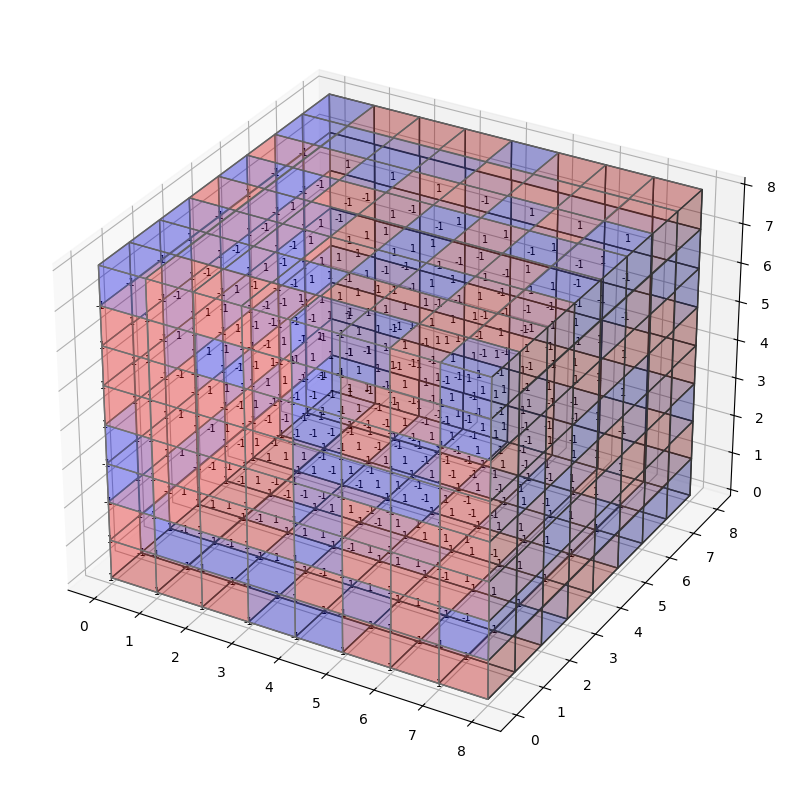

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Set matrix dimensions
axes = [8, 8, 8]  # Using a smaller size for better visualization; change to [64, 64, 64] if needed
traj = np.random.choice([-1, 1], axes)  # Generate random values of -1 and 1

alpha = 0.2  # Transparency for better visibility of text
colors = np.empty(axes + [4], dtype=np.float32)
colors[traj == 1] = [1, 0, 0, alpha]  # red for 1
colors[traj == -1] = [0, 0, 1, alpha]  # blue for -1

# Create the 3D plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.voxels(traj, facecolors=colors, edgecolors='gray')

# Add text to each voxel
for (x, y, z), value in np.ndenumerate(traj):
    ax.text(x, y, z, str(value), color="black", ha='center', va='center', fontsize=7)

plt.show()


# MLP Numpy

In [39]:
################################################################################
# MIT License
#
# Copyright (c) 2024 University of Amsterdam
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to conditions.
#
# Author: Deep Learning Course (UvA) | Fall 2024
# Date Created: 2024-10-28
################################################################################
"""
This module implements a multi-layer perceptron (MLP) in NumPy.
You should fill in code into indicated sections.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from modules import *


class MLP(object):
    """
    This class implements a Multi-layer Perceptron in NumPy.
    It handles the different layers and parameters of the model.
    Once initialized an MLP object can perform forward and backward.
    """

    def __init__(self, n_inputs, n_hidden, n_classes):
        """
        Initializes MLP object.

        Args:
          n_inputs: number of inputs.
          n_hidden: list of ints, specifies the number of units
                    in each linear layer. If the list is empty, the MLP
                    will not have any linear layers, and the model
                    will simply perform a multinomial logistic regression.
          n_classes: number of classes of the classification problem.
                     This number is required in order to specify the
                     output dimensions of the MLP

        TODO:
        Implement initialization of the network.
        """

        #######################
        # PUT YOUR CODE HERE  #
        #######################
        self.n_inputs = n_inputs
        self.n_hidden = n_hidden
        self.n_classes = n_classes

        # Initialize layers
        self.layers = []
        in_features = n_inputs

        # Add hidden layers
        for out_features in n_hidden:
            self.layers.append(LinearModule(in_features, out_features))
            self.layers.append(ELUModule(alpha=1.0))
            in_features = out_features

        # Add output layer
        self.layers.append(LinearModule(in_features, n_classes))
        self.softmax = SoftMaxModule()
        #######################
        # END OF YOUR CODE    #
        #######################

    def forward(self, x):
        """
        Performs forward pass of the input. Here an input tensor x is transformed through
        several layer transformations.

        Args:
          x: input to the network
        Returns:
          out: outputs of the network

        TODO:
        Implement forward pass of the network.
        """

        #######################
        # PUT YOUR CODE HERE  #
        #######################
        out = x
        for layer in self.layers:
            out = layer.forward(out)
        out = self.softmax.forward(out)
        #######################
        # END OF YOUR CODE    #
        #######################

        return out

    def backward(self, dout):
        """
        Performs backward pass given the gradients of the loss.

        Args:
          dout: gradients of the loss

        TODO:
        Implement backward pass of the network.
        """

        #######################
        # PUT YOUR CODE HERE  #
        #######################
        dout = self.softmax.backward(dout)

        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        #######################
        # END OF YOUR CODE    #
        #######################

    def clear_cache(self):
        """
        Remove any saved tensors for the backward pass from any module.
        Used to clean-up model from any remaining input data when we want to save it.

        TODO:
        Iterate over modules and call the 'clear_cache' function.
        """

        #######################
        # PUT YOUR CODE HERE  #
        #######################
        for layer in self.layers:
            layer.clear_cache()
        #######################
        # END OF YOUR CODE    #
        #######################


# Training

In [40]:
################################################################################
# MIT License
#
# Copyright (c) 2024 University of Amsterdam
#
# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this software and associated documentation files (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to conditions.
#
# Author: Deep Learning Course (UvA) | Fall 2024
# Date Created: 2024-10-28
################################################################################
"""
This module implements training and evaluation of a multi-layer perceptron in NumPy.
You should fill in code into indicated sections.
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import numpy as np
import os
from tqdm.auto import tqdm
from copy import deepcopy
from mlp_numpy import MLP
from modules import CrossEntropyModule
import cifar10_utils

import torch


def accuracyNB(predictions, targets):
    """
    Computes the prediction accuracy, i.e. the average of correct predictions
    of the network.

    Args:
      predictions: 2D float array of size [batch_size, n_classes], predictions of the model (logits)
      labels: 1D int array of size [batch_size]. Ground truth labels for
              each sample in the batch
    Returns:
      accuracy: scalar float, the accuracy of predictions between 0 and 1,
                i.e. the average correct predictions over the whole batch

    TODO:
    Implement accuracy computation.
    """

    #######################
    # PUT YOUR CODE HERE  #
    #######################
    predictions = np.squeeze(predictions)
    assert predictions.shape == targets.shape, f"Accuracy: Predictions and targets have different batch sizes, {predictions.shape} != {targets.shape}"
    accuracy = np.mean(predictions == targets)
    #######################
    # END OF YOUR CODE    #
    #######################

    return accuracy


def evaluate_modelNB(model, data_loader):
    """
    Performs the evaluation of the MLP model on a given dataset.

    Args:
      model: An instance of 'MLP', the model to evaluate.
      data_loader: The data loader of the dataset to evaluate.
    Returns:
      avg_accuracy: scalar float, the average accuracy of the model on the dataset.

    TODO:
    Implement evaluation of the MLP model on a given dataset.

    Hint: make sure to return the average accuracy of the whole dataset,
          independent of batch sizes (not all batches might be the same size).
    """

    #######################
    # PUT YOUR CODE HERE  #
    #######################
    accuracies = []
    batch_sizes = []
    
    for batch_data, batch_targets in data_loader:
        # Forward pass
        predictions = model.forward(batch_data)
        # Calculate accuracy for this batch
        batch_accuracy = accuracyNB(predictions, batch_targets)
        accuracies.append(batch_accuracy)
        batch_sizes.append(len(batch_data))
    
    # Compute weighted average of accuracies based on batch sizes
    avg_accuracy = np.average(accuracies, weights=batch_sizes)
    #######################
    # END OF YOUR CODE    #
    #######################

    return avg_accuracy



In [58]:
# Define the hyperparameters
seed = 42
data_dir = '../data'
batch_size = 128
epochs = 1
lr = 0.1
hidden_dims = [128]

################################################################################
np.random.seed(seed)
torch.manual_seed(seed)

## Loading the dataset
cifar10 = cifar10_utils.get_cifar10(data_dir)
cifar10_loader = cifar10_utils.get_dataloader(cifar10, batch_size=batch_size,
                                                return_numpy=True)

#######################
# PUT YOUR CODE HERE  #
#######################

# TODO: Initialize model and loss module
# Initialize model and loss module
n_inputs = 3 * 32 * 32  # CIFAR10 images: 3 channels, 32x32 pixels
n_classes = 10
model = MLP(n_inputs, hidden_dims, n_classes)
loss_module = CrossEntropyModuleNB()
# TODO: Training loop including validation
val_accuracies = []
# TODO: Test best model
test_accuracy = 0.0
# TODO: Add any information you might want to save for plotting
logging_dict = {'losses': [], 'val_accuracies': [],
                    'test_accuracy': 0.0, 'best_validation_accuracy': 0.0}

# Initialize best model
best_model = None

for epoch in tqdm(range(epochs), desc='Training'):
    # Training
    for batch_data, batch_targets in cifar10_loader['train']:
        # Flatten
        batch_data = batch_data.reshape(batch_data.shape[0], -1)
        #print(f"batch_data.shape: {batch_data.shape}")
        # Forward pass
        predictions = model.forward(batch_data)
        #print(f"predictions.shape: {predictions.shape}")
        #print(f"batch_targets.shape: {batch_targets.shape}")
        # Calculate loss and append to logging
        loss = loss_module.forward(predictions, batch_targets)
        if len(logging_dict['losses']) % 100 == 0:
            print(f"Iteration {len(logging_dict['losses'])}, Loss: {loss}")
        logging_dict['losses'].append(loss)
        # Backward pass
        dL_dy = loss_module.backward(predictions, batch_targets)
        #print(f"dL_dy.shape: {dL_dy.shape}")
        model.backward(dL_dy)

        # Update weights using SGD
        for layer in model.layers:
            if hasattr(layer, 'params'):
                #print(f"Layer {layer}")
                for param_name, param in layer.params.items():
                    #print(f"param_name: {param_name}")
                    #print(f"param.shape: {param.shape}")
                    #print(f"layer.grads[{param_name}].shape: {layer.grads[param_name].shape}")
                    param -= lr * layer.grads[param_name]
    # Validation data
    for val_data, val_targets in cifar10_loader['validation']:
        # Flatten
        val_data = val_data.reshape(val_data.shape[0], -1)
        # Convert val_targets to one-hot encoding
        val_targets_onehot = np.zeros((val_targets.size, n_classes))
        val_targets_onehot[np.arange(val_targets.size), val_targets] = 1
        # Assert
        assert val_targets_onehot.shape == (val_data.shape[0], n_classes), "Validation data shape mismatch"
        # Evaluate model on validation set
        val_accuracy = evaluate_modelNB(model, zip(val_data, val_targets_onehot))
        val_accuracies.append(val_accuracy)

        # Save best model
        if best_model is None or val_accuracy > max(val_accuracies):
            best_validation_accuracy = val_accuracy
            best_model = deepcopy(model)

    # Save best model
    if best_model is None or val_accuracy > max(val_accuracies):
        best_validation_accuracy = val_accuracy
        best_model = deepcopy(model)

# Evaluate best model on test set
for test_data, test_targets in cifar10_loader['test']:
    # Flatten
    test_data = test_data.reshape(test_data.shape[0], -1)
    # Convert test_targets to one-hot encoding
    test_targets_onehot = np.zeros((test_targets.size, n_classes))
    test_targets_onehot[np.arange(test_targets.size), test_targets] = 1
    # Assert
    assert test_targets_onehot.shape == (test_data.shape[0], n_classes), "Test data shape mismatch"
    # Evaluate model on test set
    test_accuracy = evaluate_modelNB(best_model, zip(test_data, test_targets_onehot))

# Save logging information
logging_dict['val_accuracies'] = val_accuracies
logging_dict['test_accuracy'] = test_accuracy
logging_dict['best_validation_accuracy'] = best_validation_accuracy
#######################
# END OF YOUR CODE    #
#######################

Files already downloaded and verified
Files already downloaded and verified


Training:   0%|          | 0/1 [00:00<?, ?it/s]

batch_data.shape: (128, 3072)
Iteration 0, Loss: 394.3059771137623
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
batch_data.shape: (128, 3072)
bat

In [71]:
hidden_dims = "256 128"


[256, 128]

In [43]:
accuracies = []
batch_sizes = []

for batch_data, batch_targets in zip(val_data, val_targets_onehot):
    # Forward pass
    predictions = model.forward(batch_data)
    predictions = np.argmax(predictions, axis=0)

# Print prediction shape
print(f"predictions.shape: {predictions.shape}")
print(f"predictions: {predictions}")
print(f"batch_targets: {batch_targets}")

# Calculate accuracy for this batch
np.squeeze(predictions).shape, batch_targets.shape
print(f"accuracy(predictions, batch_targets): {accuracyNB(predictions, batch_targets)}")

predictions.shape: (10,)
predictions: [0 0 0 0 0 0 0 0 0 0]
batch_targets: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
accuracy(predictions, batch_targets): 0.9


3072

In [52]:
model = MLP(n_inputs, hidden_dims, n_classes)
for layer in model.layers:
    print(layer)
    if hasattr(layer, 'params'):
        print(layer.params)
    if hasattr(layer, 'grads'):
        print(layer.grads)

{'weight': array([[-0.04588026,  0.02998939,  0.0456344 , ...,  0.01288792,
        -0.03492511,  0.03284351],
       [ 0.01649484, -0.01025392,  0.01601139, ..., -0.02791633,
        -0.03927781, -0.01783869],
       [ 0.03085873, -0.00279068, -0.02068511, ..., -0.00423011,
        -0.03182942,  0.05152587],
       ...,
       [-0.00233526,  0.01459832, -0.00163659, ...,  0.00053206,
        -0.00706806,  0.04054797],
       [-0.01013594, -0.00803153, -0.01763775, ..., -0.00541066,
         0.00696978,  0.00666043],
       [ 0.05872743, -0.04763781,  0.01268837, ..., -0.02793433,
         0.03217045, -0.00671029]]), 'bias': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       